In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings
from scipy import stats

In [8]:
is_plateau_hist = np.genfromtxt('is_plateau_hist.csv', delimiter=",", dtype=float).flatten()
is_plateau_pi = np.genfromtxt('is_plateau_pi.csv', delimiter=",", dtype=float).flatten()
volc = -np.genfromtxt('sigl.txt', delimiter=",", dtype=float).flatten()
volc_source = np.genfromtxt('volc_source_850_1850.csv', delimiter=",", dtype=float).flatten()

In [9]:
N=10000
win = 240 # window = 20 years
is_plateau_hist_dist_1 = np.zeros((N))
is_plateau_pi_dist_1 = np.zeros((N))


volc_year = 0
i = 0
while i < N :
    rand_year = random.sample(range(0, is_plateau_hist.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12)) 
    if volc_source[volc_year] != 1.0 : # Tropical Eruptions only
        continue
    if volc[volc_year] < 3.7 : # Large Volcanic eruptions
        continue
    is_plateau_hist_window = is_plateau_hist[rand_year[0]:rand_year[0]+win]
    is_plateau_hist_dist_1[i] = np.sum(is_plateau_hist_window)
    i = i + 1

i = 0
while i < N :
    rand_year = random.sample(range(0, is_plateau_pi.shape[0]-win), 1)
    is_plateau_pi_window = is_plateau_pi[rand_year[0]:rand_year[0]+win]
    is_plateau_pi_dist_1[i] = np.sum(is_plateau_pi_window)
    i = i + 1

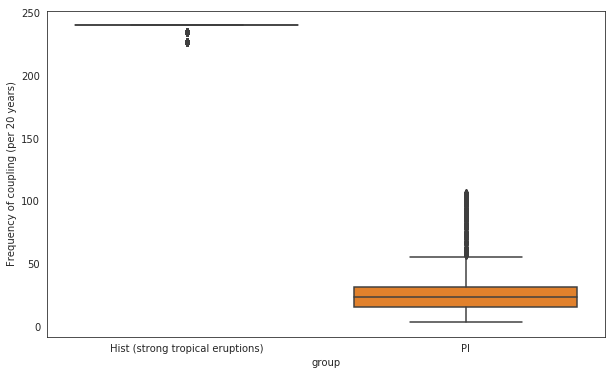

In [15]:
import seaborn as sns
import pandas as pd
ed = pd.DataFrame({ 'group' : np.repeat('Hist (strong tropical eruptions)',10000), 'Frequency of coupling (per 20 years)': is_plateau_hist_dist_1 })
lf = pd.DataFrame({ 'group' : np.repeat('PI',10000), 'Frequency of coupling (per 20 years)': is_plateau_pi_dist_1 })
df=ed.append(lf)
plt.figure(figsize=(10,6))
sns.set_style(style='white')
sns.boxplot(x='group', y='Frequency of coupling (per 20 years)', data=df)
plt.savefig('hist_pi_box_whisker.png', format='png', dpi=1000)

In [13]:
is_plateau_hist_dist_1

array([240., 240., 240., ..., 240., 240., 240.])